In [1]:
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
import pickle as pkl

####Breast Cancer
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
X=data_breast_cancer["data"]
X=X[['mean texture', 'mean symmetry']]
y=data_breast_cancer["target"]
# print(X,y)
# print(data_breast_cancer['DESCR'])
print(X)

     mean texture  mean symmetry
0           10.38         0.2419
1           17.77         0.1812
2           21.25         0.2069
3           20.38         0.2597
4           14.34         0.1809
..            ...            ...
564         22.39         0.1726
565         28.25         0.1752
566         28.08         0.1590
567         29.33         0.2397
568         24.54         0.1587

[569 rows x 2 columns]


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
tree_clf_2=DecisionTreeClassifier(max_depth=1)
tree_clf_2.fit(X_train,y_train)
best_depth = None
best_f1_train = 0
best_f1_test = 0
best_acc_train=0
best_acc_test=0

for depth in range(1, 1000):
    tree_clf=DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)

    y_pred_train = tree_clf.predict(X_train)
    y_pred_test = tree_clf.predict(X_test)

    f1_train = f1_score(y_train, y_pred_train)
    print(depth, f1_train)
    f1_test = f1_score(y_test, y_pred_test)
    print(depth, f1_test)
    acc_train=accuracy_score(y_train, y_pred_train)
    acc_test=accuracy_score(y_test, y_pred_test)

    if f1_test > best_f1_test:
        best_depth = depth
        best_f1_train = f1_train
        best_f1_test = f1_test
        best_acc_train=acc_train
        best_acc_test=acc_test
print(best_depth)

1 0.768939393939394
1 0.7737226277372262
2 0.8213689482470785
2 0.8407643312101911
3 0.8261617900172117
3 0.8366013071895425
4 0.836734693877551
4 0.8258064516129032
5 0.8630849220103987
5 0.8108108108108109
6 0.8725314183123877
6 0.7571428571428571
7 0.8979591836734694
7 0.7432432432432431
8 0.9049295774647887
8 0.7866666666666666
9 0.9318996415770608
9 0.7412587412587412
10 0.9473684210526315
10 0.7272727272727273
11 0.9657657657657657
11 0.7534246575342465
12 0.9785714285714285
12 0.7482993197278911
13 0.9875222816399288
13 0.7412587412587412
14 0.998236331569665
14 0.7432432432432431
15 0.9982300884955753
15 0.7600000000000001
16 1.0
16 0.7482993197278911
17 1.0
17 0.738255033557047
18 1.0
18 0.7567567567567567
19 1.0
19 0.736842105263158
20 1.0
20 0.738255033557047
21 1.0
21 0.7417218543046358
22 1.0
22 0.7284768211920529
23 1.0
23 0.7432432432432431
24 1.0
24 0.7466666666666667
25 1.0
25 0.7567567567567567
26 1.0
26 0.7333333333333334
27 1.0
27 0.7466666666666667
28 1.0
28 0.7549

In [4]:
arr=[best_depth, best_f1_train, best_f1_test, best_acc_train, best_acc_test]
print(arr)
with open("f1acc_tree.pkl", "wb") as f:
    pkl.dump(arr, f)

from sklearn.tree import export_graphviz
import graphviz

eg=export_graphviz(tree_clf_2, out_file=None)
png = graphviz.Source(eg)
png.render("bc.png")

[2, 0.8213689482470785, 0.8407643312101911, 0.7648351648351648, 0.7807017543859649]


'bc.png.pdf'

####Regression

<Axes: xlabel='x', ylabel='y'>

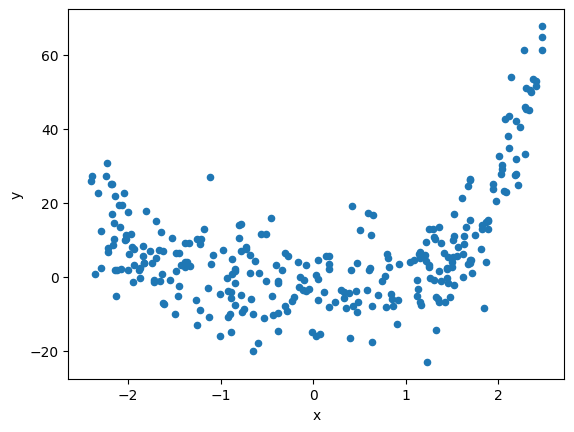

In [5]:
import numpy as np
size = 300
X2 = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y2 = w4*(X2**4) + w3*(X2**3) + w2*(X2**2) + w1*X2 + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X2, 'y': y2})
df.plot.scatter(x='x',y='y')

In [6]:
X2=X2.reshape(-1,1)
y2=y2.reshape(-1,1)
X2_train, X2_test, y2_train, y2_test=train_test_split(X2, y2, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg_2=DecisionTreeRegressor(max_depth=1)
tree_reg_2.fit(X2_train, y2_train)
best_depth2=None
best_mse_train=100000000000000
best_mse_test=100000000000000

for depth in range(1,1000):
    tree_reg = DecisionTreeRegressor(max_depth=depth)
    tree_reg.fit(X2_train, y2_train)

    y2_pred_train=tree_reg.predict(X2_train)
    y2_pred_test=tree_reg.predict(X2_test)

    mse_train=mean_squared_error(y2_train, y2_pred_train)
    mse_test=mean_squared_error(y2_test, y2_pred_test)

    if mse_test<best_mse_test:
        tree_reg_2=tree_reg
        best_depth=depth
        best_mse_train=mse_train
        best_mse_test=mse_test

arr=[best_depth, best_mse_train, best_mse_test]
print(arr)
with open("mse_tree.pkl", "wb") as file:
    pkl.dump(arr, file)

[4, 59.593814757371774, 69.37986308468695]


In [8]:
dot_data = export_graphviz(tree_reg_2, out_file="reg.png", feature_names=['x'], filled=True, rounded=True, special_characters=True)